In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [6]:
df=pd.read_csv('ipl_2024_deliveries.csv')

In [7]:
df.shape

(17053, 20)

In [8]:
df.isna().sum()

match_id                0
season                  0
match_no                0
date                    0
venue                   0
batting_team            0
bowling_team            0
innings                 0
over                    0
striker                 0
bowler                  0
runs_of_bat             0
extras                  0
wide                    0
legbyes                 0
byes                    0
noballs                 0
wicket_type         16170
player_dismissed    16170
fielder             16344
dtype: int64

Top Scoring Batsmen:

Identify the top 10 batsmen based on the total runs scored across all matches. Plot their total runs in a bar graph, and also include their average runs per match.

Bowler Performance Analysis:

Identify the top 5 bowlers with the most wickets (considering only dismissals like bowled, caught, lbw, etc.). Plot their wickets against the total runs they have conceded.

Innings Comparison:

Compare the run rate progression of the first innings vs. the second innings for all matches. Plot the average run rate at the end of each over for both innings.

Extras Contribution:

Calculate the percentage contribution of extras (wide, legbyes, byes, noballs) to the total score for each team. Visualize the contributions using a 
pie chart for each team.
Run Distribution by Batsman:

For a given batsman, plot a histogram of the runs scored per ball faced. Compare this distribution with the batsman's overall strike rate.

Venue Analysis:

Analyze the average runs scored per match at different venues. Plot a bar graph showing the average match total at each venue.

Bowling Economy:

Calculate and plot the economy rate (runs per over) for each bowler. Highlight the bowlers with the top 10 best economy rates.

Powerplay Performance:

Analyze the performance of teams during the powerplay overs (first 6 overs). Plot the average runs scored and wickets lost during this period for each team.

Batsman vs. Bowler Matchup:

For a given pair of batsman and bowler, analyze and plot the number of runs scored, boundaries hit, and dismissals. This should be done for several prominent batsman-bowler pairs.

Chasing Performance:

Compare the performance of teams when chasing targets. Plot the success rate of chasing teams for different target ranges (e.g., 0-50, 51-100, 101-150, 151-200, 201+ runs).

In [74]:
df.head(10)

,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,matches
0,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,1
1,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,1
2,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,1
3,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,1
4,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,1
5,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.5,du Plessis,Chahar,4,0,0,0,0,0,1
6,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.6,du Plessis,Chahar,1,0,0,0,0,0,1
7,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,1.1,du Plessis,Tushar Deshpande,4,0,0,0,0,0,1
8,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,1.2,du Plessis,Tushar Deshpande,0,0,0,0,0,0,1
9,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,1.3,du Plessis,Tushar Deshpande,4,0,0,0,0,0,1


In [12]:
df.drop(columns=['match_id','wicket_type','player_dismissed','fielder','season'],inplace=True,axis=1)

In [13]:
df.shape

(17053, 15)

Identify the top 10 batsmen based on the total runs scored across all matches. Plot their total runs in a bar graph, and also include their average runs per match.

In [42]:
players = []
matches = 0
last_match_no = None

def total_match(row):
    global matches, last_match_no

    if row['striker'] in players:
        if last_match_no != row['match_no']:
            matches += 1
    else:
        players.append(row['striker'])
        matches = 1
    
    row['matches'] = matches
    last_match_no = row['match_no']
    
    return row



In [43]:
# Apply the function to each row
df = df.apply(total_match, axis=1)

In [44]:
df.head()

,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,matches
0,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,1
1,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,1
2,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,1
3,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,1
4,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,1


In [45]:
top_batsman=df.groupby('striker')['runs_of_bat'].sum().reset_index()

In [51]:
match_counts = df.groupby('striker')['match_no'].nunique().reset_index()

# Rename the columns for clarity
match_counts.columns = ['striker', 'total_matches']

In [53]:
top_batsman

,striker,runs_of_bat
0,Abdul Samad,182
1,Abhinav Manohar,9
2,Abhishek Sharma,484
3,Abishek Porel,327
4,Akash Deep,2
...,...,...
165,Williamson,27
166,Wood,9
167,Yudhvir Singh,21
168,de Kock,250


In [54]:
new_top = pd.merge(top_batsman, match_counts, on='striker', how='left')


In [55]:
new_top

,striker,runs_of_bat,total_matches
0,Abdul Samad,182,12
1,Abhinav Manohar,9,2
2,Abhishek Sharma,484,16
3,Abishek Porel,327,12
4,Akash Deep,2,1
...,...,...,...
165,Williamson,27,2
166,Wood,9,1
167,Yudhvir Singh,21,2
168,de Kock,250,11


In [56]:
new_top=new_top.sort_values(by='runs_of_bat' ,ascending=False)

In [57]:
new_top

,striker,runs_of_bat,total_matches
59,Kohli,741,15
37,Gaikwad,583,14
112,Riyan Parag,573,14
46,Head,567,15
121,Samson,531,15
...,...,...,...
157,Vaibhav Arora,1,1
66,Maharaj,1,1
162,Washington Sundar,0,1
153,Tushar Deshpande,0,1


In [58]:
new_top[:10]

,striker,runs_of_bat,total_matches
59,Kohli,741,15
37,Gaikwad,583,14
112,Riyan Parag,573,14
46,Head,567,15
121,Samson,531,15
118,Sai Sudharsan,527,12
100,Rahul,520,14
93,Pooran,499,14
83,Narine,488,14
2,Abhishek Sharma,484,16


In [59]:
new_top['avg_runs_per_match'] = new_top['runs_of_bat'] / new_top['total_matches']

In [60]:
new_top

,striker,runs_of_bat,total_matches,avg_runs_per_match
59,Kohli,741,15,49.400000
37,Gaikwad,583,14,41.642857
112,Riyan Parag,573,14,40.928571
46,Head,567,15,37.800000
121,Samson,531,15,35.400000
...,...,...,...,...
157,Vaibhav Arora,1,1,1.000000
66,Maharaj,1,1,1.000000
162,Washington Sundar,0,1,0.000000
153,Tushar Deshpande,0,1,0.000000


In [61]:
top_10=new_top[:10]

Text(0.5, 1.0, 'Total Runs scored by batcsman')

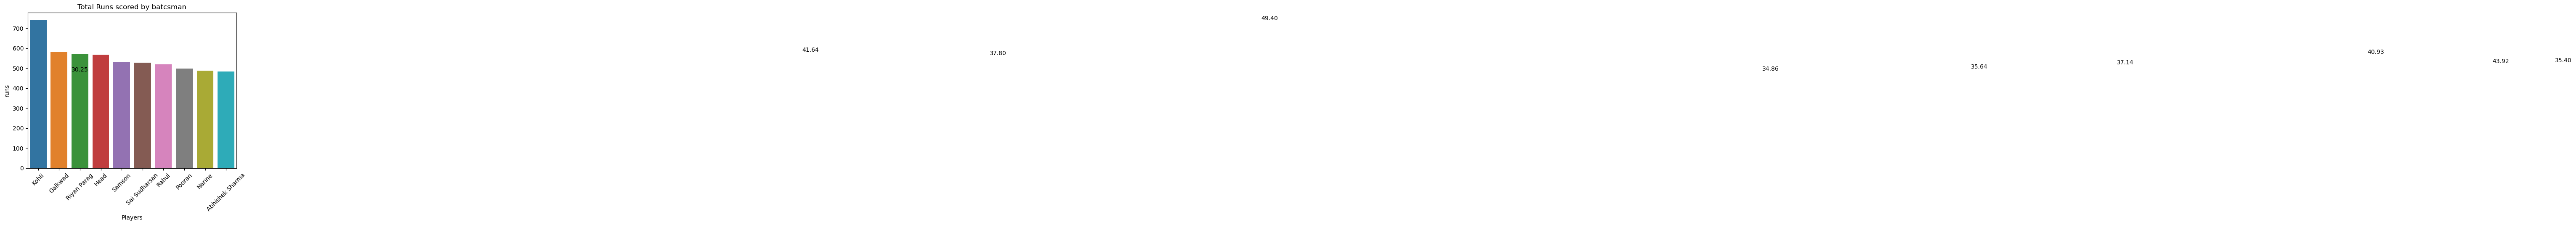

In [69]:
sb.barplot(x='striker',y='runs_of_bat',data=top_10)

for index, row in top_10.iterrows():
    plt.text(index, row['runs_of_bat'], f'{row["avg_runs_per_match"]:.2f}', color='black', ha="center")
plt.xlabel('Players')

plt.ylabel('runs')
plt.xticks(rotation=45)
plt.title('Total Runs scored by batcsman')

In [75]:
df.head(10)

,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,matches
0,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,1
1,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,1
2,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,1
3,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,1
4,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,1
5,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.5,du Plessis,Chahar,4,0,0,0,0,0,1
6,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.6,du Plessis,Chahar,1,0,0,0,0,0,1
7,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,1.1,du Plessis,Tushar Deshpande,4,0,0,0,0,0,1
8,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,1.2,du Plessis,Tushar Deshpande,0,0,0,0,0,0,1
9,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,1.3,du Plessis,Tushar Deshpande,4,0,0,0,0,0,1


In [84]:
df['overs_conventional'] = df['over'].apply(lambda x: int(np.floor(float(x)) + 1))

In [86]:
df.head(10)

,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,matches,overs_conventional,overs_conventional1
0,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,1,1,1.0
1,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,1,1,1.0
2,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,1,1,1.0
3,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,1,1,1.0
4,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,1,1,1.0
5,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.5,du Plessis,Chahar,4,0,0,0,0,0,1,1,1.0
6,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.6,du Plessis,Chahar,1,0,0,0,0,0,1,1,1.0
7,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,1.1,du Plessis,Tushar Deshpande,4,0,0,0,0,0,1,2,2.0
8,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,1.2,du Plessis,Tushar Deshpande,0,0,0,0,0,0,1,2,2.0
9,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,1.3,du Plessis,Tushar Deshpande,4,0,0,0,0,0,1,2,2.0


In [87]:
result = df.groupby(['innings', 'overs_conventional']).agg({'runs_of_bat': 'sum', 'extras': 'sum'}).reset_index()

In [89]:
result['total_runs'] = result['runs_of_bat'] + result['extras']

In [96]:
result['ave_runs']=result['total_runs'] /6

In [93]:
result['innings']=result['innings'].astype(str)

In [99]:
average_run_rate_over = result.groupby(['innings', 'overs_conventional'])['ave_runs'].mean().reset_index()

In [100]:
average_run_rate_over

,innings,overs_conventional,ave_runs
0,1,1,82.000000
1,1,2,106.333333
2,1,3,120.333333
3,1,4,113.666667
4,1,5,109.166667
5,1,6,109.833333
6,1,7,91.333333
7,1,8,94.166667
8,1,9,112.500000
9,1,10,97.666667


Text(0.5, 1.0, 'Total Runs scored by innings by overs')

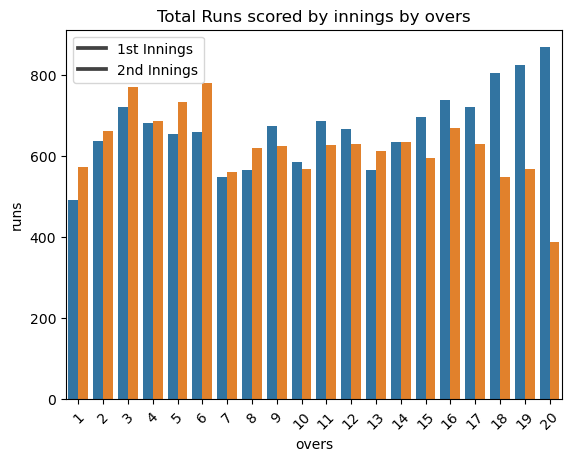

In [95]:
sb.barplot(x='overs_conventional',y='total_runs',hue='innings',data=result)


plt.xlabel('overs')
plt.legend(labels=['1st Innings', '2nd Innings'])
plt.ylabel('runs')
plt.xticks(rotation=45)
plt.title('Total Runs scored by innings by overs')

In [101]:
df.head()

,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,matches,overs_conventional,overs_conventional1
0,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,1,1,1.0
1,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,1,1,1.0
2,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,1,1,1.0
3,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,1,1,1.0
4,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,1,1,1.0


In [120]:
team = df.groupby(['batting_team']).agg({'runs_of_bat': 'sum', 'extras': 'sum'}).reset_index()

In [121]:
team

,batting_team,runs_of_bat,extras
0,CSK,2405,117
1,DC,2465,104
2,GT,1934,104
3,KKR,2481,180
4,LSG,2350,124
5,MI,2422,145
6,PBKS,2372,109
7,RCB,2789,134
8,RR,2533,106
9,SRH,2906,141


In [122]:
team['total_runs'] = team['runs_of_bat'] + team['extras']

In [123]:
# Calculate percentage contribution of extras to the total score
team['extras_contribution_percentage'] = (team['extras'] / (team['total_runs'] + team['extras'])) * 100


In [124]:
team

,batting_team,runs_of_bat,extras,total_runs,extras_contribution_percentage
0,CSK,2405,117,2522,4.433498
1,DC,2465,104,2569,3.890759
2,GT,1934,104,2038,4.855275
3,KKR,2481,180,2661,6.335797
4,LSG,2350,124,2474,4.772902
5,MI,2422,145,2567,5.346608
6,PBKS,2372,109,2481,4.208494
7,RCB,2789,134,2923,4.383382
8,RR,2533,106,2639,3.861566
9,SRH,2906,141,3047,4.422836


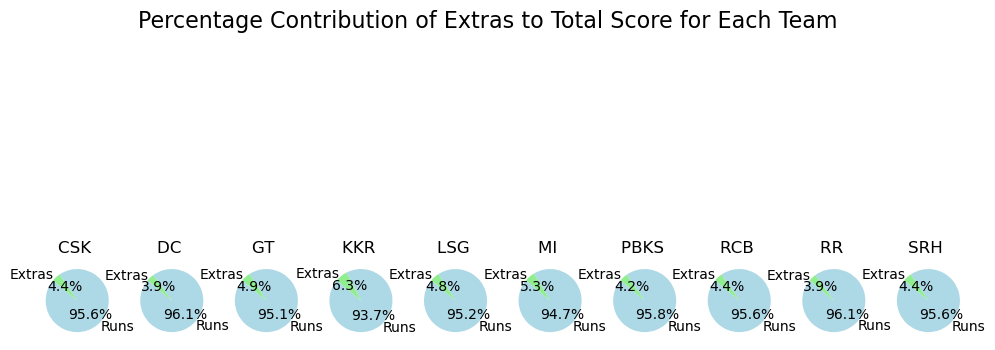

In [146]:
# Plotting pie chart for each team
plt.figure(figsize=(12, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']
for i, teams in enumerate(team['batting_team']):
    plt.subplot(1, len(team), i+1)
    plt.pie([team.loc[i, 'total_runs'], team.loc[i, 'extras']], 
            labels=['Runs', 'Extras'], autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f'{teams} ')
plt.suptitle('Percentage Contribution of Extras to Total Score for Each Team', fontsize=16)
plt.show()

In [125]:
team['batting_team']

0     CSK
1      DC
2      GT
3     KKR
4     LSG
5      MI
6    PBKS
7     RCB
8      RR
9     SRH
Name: batting_team, dtype: object

In [128]:
overs_6=df[df['overs_conventional']<=6]

In [129]:
overs_6

,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,matches,overs_conventional,overs_conventional1
0,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,1,1,1.0
1,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,1,1,1.0
2,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,1,1,1.0
3,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,1,1,1.0
4,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17021,74,"May 26, 2024","MA Chidambaram Stadium, Chennai",KKR,SRH,2,5.2,Venkatesh Iyer,T Natarajan,4,0,0,0,0,0,4,6,6.0
17022,74,"May 26, 2024","MA Chidambaram Stadium, Chennai",KKR,SRH,2,5.3,Venkatesh Iyer,T Natarajan,6,0,0,0,0,0,4,6,6.0
17023,74,"May 26, 2024","MA Chidambaram Stadium, Chennai",KKR,SRH,2,5.4,Venkatesh Iyer,T Natarajan,4,0,0,0,0,0,4,6,6.0
17024,74,"May 26, 2024","MA Chidambaram Stadium, Chennai",KKR,SRH,2,5.5,Venkatesh Iyer,T Natarajan,1,0,0,0,0,0,4,6,6.0


In [130]:
match_counts_team = df.groupby('batting_team')['match_no'].nunique().reset_index()

# Rename the columns for clarity
match_counts_team.columns = ['batting_team', 'total_matches']

In [131]:
match_counts_team

,batting_team,total_matches
0,CSK,14
1,DC,14
2,GT,12
3,KKR,14
4,LSG,14
5,MI,14
6,PBKS,14
7,RCB,15
8,RR,15
9,SRH,16


In [133]:
total_team_runs=overs_6.groupby('batting_team').agg({'runs_of_bat': 'sum', 'extras': 'sum'}).reset_index()

In [134]:
total_team_runs

,batting_team,runs_of_bat,extras
0,CSK,698,35
1,DC,849,45
2,GT,526,29
3,KKR,849,79
4,LSG,660,33
5,MI,725,64
6,PBKS,716,26
7,RCB,847,29
8,RR,740,32
9,SRH,1023,49


In [135]:
total_team_runs['total_runs'] = total_team_runs['runs_of_bat'] + total_team_runs['extras']

In [136]:
total_team_runs

,batting_team,runs_of_bat,extras,total_runs
0,CSK,698,35,733
1,DC,849,45,894
2,GT,526,29,555
3,KKR,849,79,928
4,LSG,660,33,693
5,MI,725,64,789
6,PBKS,716,26,742
7,RCB,847,29,876
8,RR,740,32,772
9,SRH,1023,49,1072


In [137]:
new = pd.merge(total_team_runs, match_counts_team, on='batting_team', how='left')


In [138]:
new

,batting_team,runs_of_bat,extras,total_runs,total_matches
0,CSK,698,35,733,14
1,DC,849,45,894,14
2,GT,526,29,555,12
3,KKR,849,79,928,14
4,LSG,660,33,693,14
5,MI,725,64,789,14
6,PBKS,716,26,742,14
7,RCB,847,29,876,15
8,RR,740,32,772,15
9,SRH,1023,49,1072,16


In [139]:
new['avg_runs_per_match'] = new['runs_of_bat'] / new['total_matches']

In [140]:
new

,batting_team,runs_of_bat,extras,total_runs,total_matches,avg_runs_per_match
0,CSK,698,35,733,14,49.857143
1,DC,849,45,894,14,60.642857
2,GT,526,29,555,12,43.833333
3,KKR,849,79,928,14,60.642857
4,LSG,660,33,693,14,47.142857
5,MI,725,64,789,14,51.785714
6,PBKS,716,26,742,14,51.142857
7,RCB,847,29,876,15,56.466667
8,RR,740,32,772,15,49.333333
9,SRH,1023,49,1072,16,63.937500


Text(0.5, 1.0, 'Average runs scored in first 6 overs ')

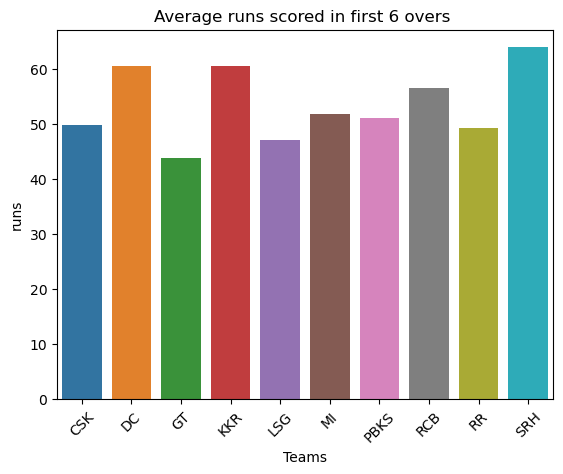

In [141]:
sb.barplot(x='batting_team',y='avg_runs_per_match',data=new)


plt.xlabel('Teams')

plt.ylabel('runs')
plt.xticks(rotation=45)
plt.title('Average runs scored in first 6 overs ')

In [156]:

def calculate_chasing_rates_for_teams(df):
    # Initialize an empty dictionary to store chasing rates for each batting team
    chasing_rates_for_teams = {}
    
    # Iterate over each unique batting team
    for team in df['batting_team'].unique():
        # Filter the DataFrame for the current batting team and innings 1
        innings_1_team = df[(df['batting_team'] == team) & (df['innings'] == 1)]
        innings_1_team['total_runs'] = innings_1_team['runs_of_bat'] + innings_1_team['extras']
        # Calculate the total score of innings 1 for the current batting team
        total_score_innings_1 = innings_1_team['total_runs'].sum()
        
        # Filter the DataFrame for the current batting team and innings 2 (chasing innings)
        innings_2_team = df[(df['batting_team'] == team) & (df['innings'] == 2)]
        
        # Calculate total runs for each row in innings 2
        innings_2_team['total_runs'] = innings_2_team['runs_of_bat'] + innings_2_team['extras']
        
        # Calculate the total score of innings 2 for the current batting team
        total_score_innings_2 = innings_2_team['total_runs'].sum()
        
        # Calculate chasing rates only if innings 2 score is greater than innings 1 score
        if total_score_innings_2 > total_score_innings_1:
            # Initialize a dictionary to store chasing rates in different ranges for the current batting team
            chasing_rates = {
                '0-50': 0,
                '51-100': 0,
                '101-150': 0,
                '151-200': 0,
                '201-300': 0
            }

            # Define the score ranges
            score_ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300)]

            # Iterate over score ranges and calculate the chasing rates for the current batting team
            for start, end in score_ranges:
                # Count the number of rows in innings 2 within the current score range
                num_matches_in_range = ((innings_2_team['total_runs'] >= start) & (innings_2_team['total_runs'] <= end)).sum()
                # Calculate the chasing rate in the current score range for the current batting team
                chasing_rate = (num_matches_in_range / len(innings_2_team)) * 100
                # Store the chasing rate in the dictionary for the current batting team
                chasing_rates[f'{start}-{end}'] = chasing_rate

            # Store the chasing rates for the current batting team in the dictionary of chasing rates for all teams
            chasing_rates_for_teams[team] = chasing_rates
    
    return chasing_rates_for_teams


In [157]:
new_df=calculate_chasing_rates_for_teams(df)

C:\Users\Arun\AppData\Local\Temp\ipykernel_13932\2407309308.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  innings_1_team['total_runs'] = innings_1_team['runs_of_bat'] + innings_1_team['extras']
C:\Users\Arun\AppData\Local\Temp\ipykernel_13932\2407309308.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  innings_2_team['total_runs'] = innings_2_team['runs_of_bat'] + innings_2_team['extras']
C:\Users\Arun\AppData\Local\Temp\ipykernel_13932\2407309308.py:9: SettingWithCopyWarning: 
A value is trying to

In [158]:
new_df

{'PBKS': {'0-50': 100.0,
  '51-100': 0.0,
  '101-150': 0.0,
  '151-200': 0.0,
  '201-300': 0.0},
 'RR': {'0-50': 100.0,
  '51-100': 0.0,
  '101-150': 0.0,
  '151-200': 0.0,
  '201-300': 0.0},
 'MI': {'0-50': 100.0,
  '51-100': 0.0,
  '101-150': 0.0,
  '151-200': 0.0,
  '201-300': 0.0}}